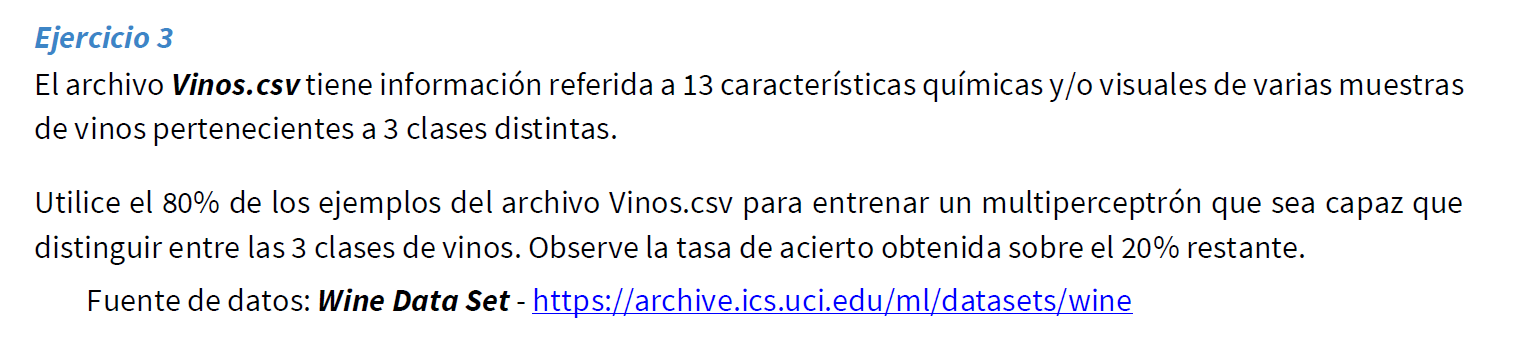

In [8]:
# configuración para notebook con instalación LOCAL
FUENTES_DIR  = '../../Datos-Fuentes/Fuentes/'     # carpeta donde se encuentran archivos .py auxiliares
DATOS_DIR    = '../../Datos-Fuentes/Datos/'      # carpeta donde se encuentran los datasets
MODELOS_DIR  = '../Modelos/'    # carpeta donde se encuentran los modelos
ARCHIVOs_DIR = '../Archivos/'   # carpeta recuperar o copiar archivos

# agrega ruta de busqueda donde tenemos archivos .py
import sys
sys.path.append(FUENTES_DIR)

In [25]:
nombre_archivo = 'C:\\Users\\Usuario\\Documents\\GitHub\\Deep-Learning\\Datos-Fuentes\\Datos\\Vinos.csv'



In [41]:
import os

##nombre_archivo = './Datos-Fuentes/Datos/Vinos.csv'

# Verifica si el archivo existe
if os.path.exists(nombre_archivo):
    print(f"El archivo {nombre_archivo} existe.")
else:
    print(f"El archivo {nombre_archivo} no se encuentra en la ruta especificada.")


El archivo C:\Users\Usuario\Documents\GitHub\Deep-Learning\Datos-Fuentes\Datos\Vinos.csv existe.


In [42]:
import chardet
import pandas as pd
##nombre_archivo = DATOS_DIR + 'Vinos.csv' # archivo de hojas

#-- detectando la codificación de caracteres usada ----
with open(nombre_archivo, 'rb') as f:
    result = chardet.detect(f.read())  # or readline if the file is large

# recupera el archivo en un objeto dataframe de pandas utilizando la codificación detectada
df = pd.read_csv(nombre_archivo, encoding=result['encoding'], sep=";")

# visualiza el dataframe

df.head()

,Class,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [56]:
df.Class.unique()

array([1, 2, 3], dtype=int64)

In [57]:
import numpy as np

from sklearn import preprocessing, model_selection
from sklearn.neural_network import MLPClassifier
from matplotlib import pyplot as plt

In [58]:
X = np.array(df.iloc[:,1:])
T = np.array(df.iloc[:,:1])

In [59]:
# Realizo one-hot encoding en las clases para convertir las etiquetas en formato binario (matriz de 0s y 1s)
binarizer = preprocessing.LabelBinarizer()
T = binarizer.fit_transform(T)

# Divido los datos en entrenamiento (80%) y prueba (20%) para evaluar el modelo en datos no vistos
X_train, X_test, T_train, T_test = model_selection.train_test_split(X, T, test_size=0.2)

# Normalizo los datos de entrada (X) para que tengan media 0 y desviación estándar 1 (mejora el rendimiento del modelo)
scaler = preprocessing.StandardScaler()

# Calculo la media y desviación estándar de los datos de entrenamiento y transformo (ajusto y aplico)
X_train = scaler.fit_transform(X_train)

# Normalizo los datos de prueba utilizando la media y desviación calculada en el conjunto de entrenamiento
# (Esto asegura que la normalización se haga de manera consistente)
X_test = scaler.transform(X_test)


In [78]:

modelo = MLPClassifier(
    hidden_layer_sizes=(2),     # Tamaño de la capa oculta: (2) significa que tiene una capa oculta con 2 neuronas.
    tol=1.0e-4,                 # Tolerancia para la parada temprana: Si la mejora es menor que 1e-4, el entrenamiento se detiene.
    activation='relu',          # Función de activación: 'relu' (Rectified Linear Unit). Es muy eficiente en redes neuronales.
    solver='adam',              # Método de optimización: 'adam'. Es un algoritmo de optimización que adapta el learning rate
    alpha=0.005,                # Coeficiente de regularización L2. Controla el overfitting. Un valor más alto
    max_iter=2500              # Número máximo de iteraciones (épocas) que el modelo ejecutará durante el entrenamiento.
).fit(X_train,T_train)

# Entrenamos el modelo con los datos de entrenamiento.
# X_train contiene los ejemplos de entrada (características) y T_train son las etiquetas de las clases.
# .fit() ajusta los pesos de la red a los datos para minimizar la función de pérdida.


In [79]:
Y_predict=modelo.predict(X_train) #Hago la prediccion usando el modelo entrenado
score=modelo.score(X_train, T_train) #calculo el accuracy del modelo
Y_it=binarizer.inverse_transform(T_train)# "invierte" la transformacion
Y_predict_it=binarizer.inverse_transform(Y_predict)
print('Efectividad: %6.2f%%' % (100*(Y_predict_it == Y_it).sum()/len(Y_it)) )
print('      Score: %6.2f' % (score) )
print(Y_predict_it)



Efectividad:  97.89%
      Score:   0.98
[2 3 2 2 3 1 2 2 1 1 2 1 3 3 2 1 1 1 1 1 2 3 3 3 3 2 2 2 2 2 2 3 2 2 1 3 1
 3 2 2 2 1 1 3 2 2 1 2 1 2 1 1 1 1 1 3 2 1 2 1 2 1 2 3 3 3 1 3 2 3 1 1 2 3
 2 2 3 3 1 1 3 1 2 2 3 1 1 2 3 3 2 3 2 1 3 1 1 1 2 2 2 1 1 3 1 2 3 3 3 3 2
 3 2 1 1 1 2 2 3 2 1 3 1 3 3 2 2 1 1 1 2 2 2 1 2 2 1 1 2 3 2 2]
